In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/water-pollution/water_potability.csv


In [2]:
df=pd.read_csv('/kaggle/input/water-pollution/water_potability.csv')

In [3]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [6]:
df.shape

(3276, 10)

In [5]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [8]:
df= df.drop(columns=['ph','Sulfate','Trihalomethanes'])

In [9]:
df.head()

,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Turbidity,Potability
0,204.890455,20791.318981,7.300212,564.308654,10.379783,2.963135,0
1,129.422921,18630.057858,6.635246,592.885359,15.180013,4.500656,0
2,224.236259,19909.541732,9.275884,418.606213,16.868637,3.055934,0
3,214.373394,22018.417441,8.059332,363.266516,18.436524,4.628771,0
4,181.101509,17978.986339,6.546600,398.410813,11.558279,4.075075,0


In [33]:
print(df['Solids'].corr(df['Potability']))
print(df['Chloramines'].corr(df['Potability']))
print(df['Conductivity'].corr(df['Potability']))
print(df['Organic_carbon'].corr(df['Potability']))
print(df['Turbidity'].corr(df['Potability']))

0.033743313393650005
0.023778971994669662
-0.008128319721545487
-0.03000136661094469
0.0015806819539223597


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Solids', ylabel='Conductivity'>

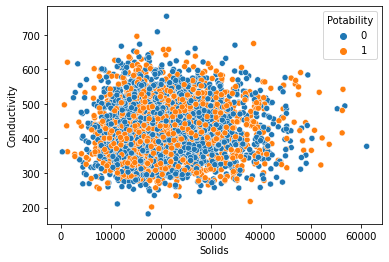

In [55]:
sns.scatterplot(df['Solids'],df['Conductivity'],hue=df['Potability'])

In [11]:
df.isnull().sum()

Hardness          0
Solids            0
Chloramines       0
Conductivity      0
Organic_carbon    0
Turbidity         0
Potability        0
dtype: int64

In [13]:
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

In [36]:
x=df.iloc[:,1:6]
x=x.drop(columns=['Organic_carbon','Conductivity'])
x

,Solids,Chloramines,Turbidity
0,20791.318981,7.300212,2.963135
1,18630.057858,6.635246,4.500656
2,19909.541732,9.275884,3.055934
3,22018.417441,8.059332,4.628771
4,17978.986339,6.546600,4.075075
...,...,...,...
3271,47580.991603,7.166639,4.435821
3272,17329.802160,8.061362,2.798243
3273,33155.578218,7.350233,3.298875
3274,11983.869376,6.303357,4.708658


In [38]:
y=df.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [41]:
x_train.shape

(2620, 3)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler=StandardScaler()

In [44]:
x_train_scaled=scaler.fit_transform(x_train)

In [45]:
x_train_scaled

array([[-0.55463361, -0.66652723, -1.3411035 ],
       [ 1.36873646,  1.74381264,  0.09082874],
       [-0.42399002, -0.24879087,  1.27418303],
       ...,
       [ 1.00441877,  0.37513468, -0.60244883],
       [-0.66599679,  0.17799402,  0.40337428],
       [ 1.42745437, -0.53174333, -0.25894741]])

In [46]:
x_test_scaled=scaler.transform(x_test)

In [59]:
x_test_scaled

array([[-0.18173596,  0.14192878,  1.18962159],
       [ 1.2234509 , -0.19925153,  0.77315088],
       [ 0.1355665 , -0.74666284, -1.88948624],
       ...,
       [-0.29774452, -1.55489206, -0.15256616],
       [ 2.49085206, -1.71637685,  1.98651089],
       [ 0.68699301,  0.54809685, -0.50106067]])

In [72]:
from sklearn.neighbors import KNeighborsClassifier  

In [73]:

classifier.fit(x_train_scaled, y_train)  

In [74]:
from sklearn.metrics import accuracy_score

In [82]:
accuracy=[]
for i in range(1,100):
    classifier= KNeighborsClassifier(n_neighbors=i)  
    classifier.fit(x_train_scaled, y_train)  
    accuracy.append(accuracy_score(y_test,classifier.predict(x_test_scaled)))
    
len(accuracy)
    

99

In [83]:
accuracy

[0.5304878048780488,
 0.5838414634146342,
 0.5564024390243902,
 0.5853658536585366,
 0.5411585365853658,
 0.5716463414634146,
 0.5533536585365854,
 0.5838414634146342,
 0.573170731707317,
 0.5960365853658537,
 0.5701219512195121,
 0.5929878048780488,
 0.586890243902439,
 0.5975609756097561,
 0.5746951219512195,
 0.5838414634146342,
 0.5945121951219512,
 0.6021341463414634,
 0.5929878048780488,
 0.600609756097561,
 0.6158536585365854,
 0.6112804878048781,
 0.6128048780487805,
 0.6097560975609756,
 0.6021341463414634,
 0.6173780487804879,
 0.6097560975609756,
 0.6067073170731707,
 0.6158536585365854,
 0.614329268292683,
 0.6128048780487805,
 0.6189024390243902,
 0.6158536585365854,
 0.6219512195121951,
 0.6112804878048781,
 0.6189024390243902,
 0.614329268292683,
 0.6204268292682927,
 0.6265243902439024,
 0.6280487804878049,
 0.6219512195121951,
 0.6326219512195121,
 0.6204268292682927,
 0.6234756097560976,
 0.6173780487804879,
 0.6204268292682927,
 0.6189024390243902,
 0.625,
 0.625,
 0

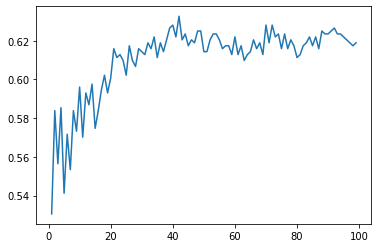

In [85]:
plt.plot(range(1,100),accuracy)

#By this graph we can find that n-neighbors should be 42 

In [96]:
classifier= KNeighborsClassifier(n_neighbors=42)  
classifier.fit(x_train_scaled, y_train) 

KNeighborsClassifier(n_neighbors=42)

In [97]:
y_pred=classifier.predict(x_test_scaled)

In [98]:
accuracy_score(y_test,y_pred)

0.6326219512195121